## Data Preparation

Step 1 - Import the libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import io
import requests

Step 2 - Read the dataset

In [2]:
dataset = pd.read_csv("binary.csv")

Step 3 - Try to understand the features

In [3]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(dataset.head())

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


In [14]:
#no of rows, cols
print(dataset.shape)

(400, 4)


In [15]:
#info about the data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 15.6 KB
None


In [16]:
#figure out non NA values
print(dataset.count())

admit    400
gre      400
gpa      400
rank     400
dtype: int64


In [8]:
#info about cols
print(dataset.columns)

Index([u'admit', u'gre', u'gpa', u'rank'], dtype='object')


In [9]:
#lets summarize the dataset

#get sum
print(dataset.sum())

admit       127.00
gre      235080.00
gpa        1355.96
rank        994.00
dtype: float64


In [10]:
#get stats
print(dataset.describe())

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [11]:
#get mean
print(dataset.mean())

admit      0.3175
gre      587.7000
gpa        3.3899
rank       2.4850
dtype: float64


In [17]:
#get median
print(dataset.median())

admit      0.000
gre      580.000
gpa        3.395
rank       2.000
dtype: float64


## Visualization

In [18]:
import seaborn as sns
sns.set(style="dark",context="talk")
f,(ax1, ax2) = plt.subplots(1,2, figsize=(10,6))

Univariate Analysis:

In [19]:
#gre scores
sns.distplot(dataset.ix[:,1], ax=ax1, color="b");

In [20]:
#gpa scores
sns.distplot(dataset.ix[:,2], ax=ax2, color="g");

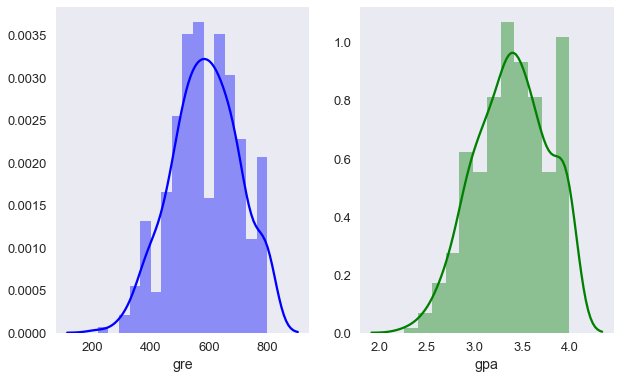

In [21]:
plt.show()

Multivariate Analysis:

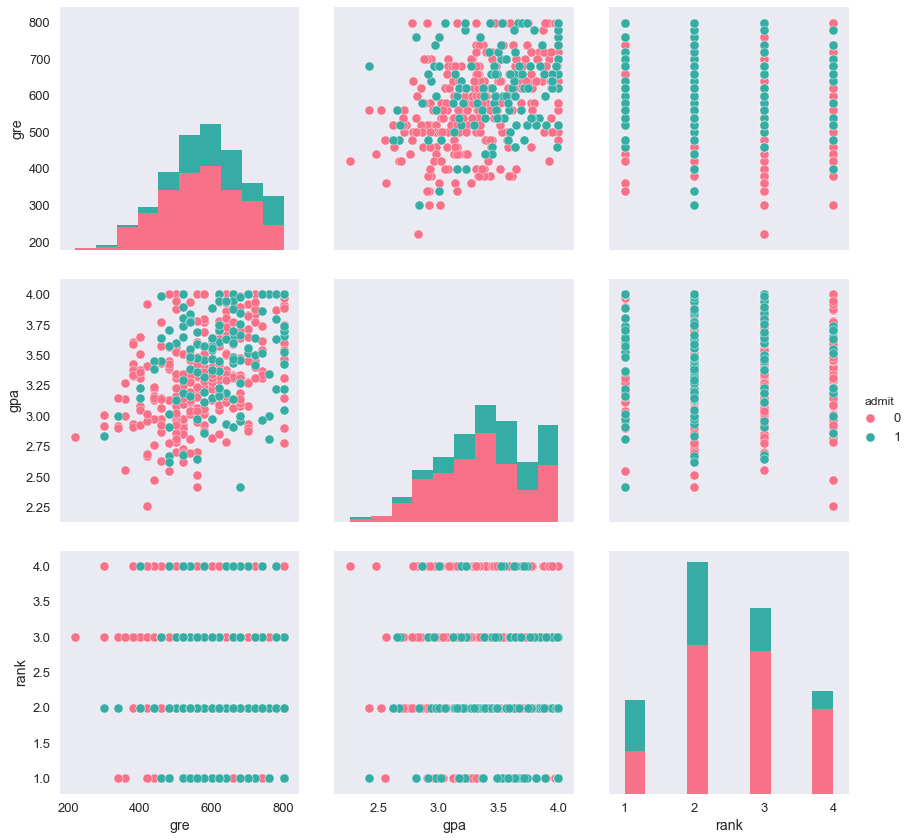

In [22]:
sns.pairplot(dataset, hue='admit',palette="husl", x_vars=["gre","gpa","rank"], y_vars=["gre","gpa","rank"], size=4)
plt.show()

## Modeling 

In [23]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [24]:
#convert dataframe into matrix
dataArray = dataset.values

In [25]:
#splitting input features & o/p vars
X = dataArray[:,1:4]
y = dataArray[:,0:1]

In [26]:
#splitting training & testing
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=validation_size, random_state = seed)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(360, 3)
(40, 3)
(360, 1)
(40, 1)


In [28]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [33]:
results = []
names = []
scoring = 'accuracy'

#bring out em cross validation
for name, model in models:
	kfold = KFold(n_splits = 10, random_state=7)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.694444 (0.087841)
LDA: 0.700000 (0.088541)
KNN: 0.658333 (0.079592)
CART: 0.627778 (0.061111)
RF: 0.675000 (0.044876)
NB: 0.688889 (0.088541)
SVM: 0.658333 (0.093830)


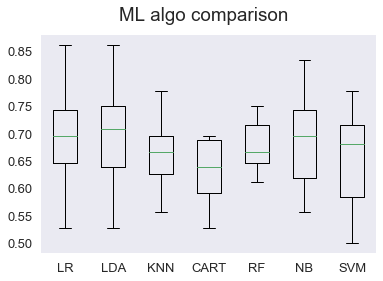

In [34]:
#lets box plot model scores

fig = pyplot.figure()
fig.suptitle('ML algo comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [35]:
#create prediction model
model = LogisticRegression()

In [36]:
#fit model
model.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
#predict!
predictions = model.predict(X_test)

In [40]:
#check accuracy
print("Model --- LogisticRegression")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions) * 100))
print(classification_report(Y_test, predictions))

Model --- LogisticRegression
Accuracy: 77.5 
             precision    recall  f1-score   support

        0.0       0.81      0.94      0.87        31
        1.0       0.50      0.22      0.31         9

avg / total       0.74      0.78      0.74        40



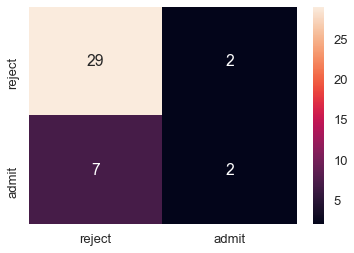

In [39]:
#plotting confusion matrix on heatmap
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, xticklabels=['reject','admit'], yticklabels=['reject','admit'])
plt.figure(figsize=(3,3))
plt.show()